# Emissions Dataset Analysis

This notebook focuses primarily on analyzing a historical emissions dataset covering the years 1850 to 2014. The dataset is originally structured in wide format, with one column per year.

While basic cleaning steps (such as removing duplicates and transforming to long format) are included, the main objective is to explore and understand patterns in the data through descriptive statistics and visualizations.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan

### Load Dataset and Remove Exact Duplicates

We begin by reading the original dataset and removing any fully duplicated rows (i.e., identical in all columns).


In [3]:
file_path = "emissions.csv"  # Update this path if needed
df = pd.read_csv(file_path)

print("First few columns:")
print(df.columns[:10])
print(f"\nTotal columns: {len(df.columns)}")
df.head()

First few columns:
Index(['Country', 'Sector', 'Parent sector', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856'],
      dtype='object')

Total columns: 168


,Country,Sector,Parent sector,1850,1851,1852,1853,1854,1855,1856,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ABW,Total including LULUCF,NaN,0.041900,0.044100,0.046500,0.049000,0.051700,0.054500,0.057500,...,2.550,2.550,2.650,2.570,2.580,2.520,2.500,1.360,0.935,1.07
1,AFG,Total including LULUCF,NaN,0.080300,0.080300,0.080300,0.080300,0.080400,0.080400,0.080400,...,1.880,2.200,2.820,4.770,7.340,9.030,12.800,21.000,21.900,25.00
2,AGO,Total including LULUCF,NaN,-0.611000,-0.484000,-0.420000,-0.447000,-0.410000,-0.495000,-0.476000,...,151.000,97.500,117.000,103.000,106.000,110.000,132.000,112.000,122.000,112.00
3,AIA,Total including LULUCF,NaN,0.000164,0.000173,0.000182,0.000192,0.000203,0.000214,0.000225,...,0.128,0.195,0.203,0.203,0.199,0.203,0.147,0.147,0.139,0.14
4,ALB,Total including LULUCF,NaN,2.110000,2.110000,2.100000,2.100000,2.100000,2.100000,2.100000,...,5.310,3.880,3.930,4.370,4.350,4.580,5.100,4.580,4.690,4.95


In [4]:
print("Duplicate entries:", df.duplicated().sum())
df_clean = df.drop_duplicates()

Duplicate entries: 2310


### Reshape from Wide to Long Format

We convert the dataset using `pd.melt`, turning year columns into row values. This format is more suitable for statistical analysis and visualization.


In [5]:
id_vars = ["Country", "Sector", "Parent sector"]
value_vars = [col for col in df_clean.columns if col not in id_vars]

df_long = df_clean.melt(id_vars=id_vars, value_vars=value_vars,
                  var_name="Year", value_name="Value")

df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")

print(f"Total rows after melting: {len(df_long)}")
df_long.head()

Total rows after melting: 418770


,Country,Sector,Parent sector,Year,Value
0,ABW,Total including LULUCF,NaN,1850,0.041900
1,AFG,Total including LULUCF,NaN,1850,0.080300
2,AGO,Total including LULUCF,NaN,1850,-0.611000
3,AIA,Total including LULUCF,NaN,1850,0.000164
4,ALB,Total including LULUCF,NaN,1850,2.110000


In [6]:
duplicates = df_long[df_long.duplicated(subset=["Country", "Sector", "Year"], keep=False)]
print(f"Duplicate rows:\n{len(duplicates)}")
duplicates.sort_values(by=["Country", "Year"]).head(10)

Duplicate rows:
37620


,Country,Sector,Parent sector,Year,Value
1290,ABW,Other,Industrial process,1850,0.0
2424,ABW,Other,NaN,1850,0.0
3828,ABW,Other,Industrial process,1851,0.0
4962,ABW,Other,NaN,1851,0.0
6366,ABW,Other,Industrial process,1852,0.0
7500,ABW,Other,NaN,1852,0.0
8904,ABW,Other,Industrial process,1853,0.0
10038,ABW,Other,NaN,1853,0.0
11442,ABW,Other,Industrial process,1854,0.0
12576,ABW,Other,NaN,1854,0.0


### Post-Transformation Analysis

We check for duplicate data points based on `(Country, Sector, Year)`, as well as min and max values.


In [7]:
duplicates = df_long[
    df_long.duplicated(subset=["Country", "Sector", "Year"], keep=False) &
    (df_long["Sector"] == "Other") & 
    (df_long["Parent sector"].isna())
]

print(f"Duplicate rows (excluding 'Other'):\n{len(duplicates)}")
duplicates.sort_values(by=["Country", "Sector", "Year"]).head(10)

Duplicate rows (excluding 'Other'):
18810


,Country,Sector,Parent sector,Year,Value
2424,ABW,Other,NaN,1850,0.0
4962,ABW,Other,NaN,1851,0.0
7500,ABW,Other,NaN,1852,0.0
10038,ABW,Other,NaN,1853,0.0
12576,ABW,Other,NaN,1854,0.0
15114,ABW,Other,NaN,1855,0.0
17652,ABW,Other,NaN,1856,0.0
20190,ABW,Other,NaN,1857,0.0
22728,ABW,Other,NaN,1858,0.0
25266,ABW,Other,NaN,1859,0.0


In [8]:
# Drop rows with missing or invalid values in critical fields
df_long = df_long.dropna(subset=["Country", "Sector", "Year", "Value"])

# Optionally inspect rows with negative values
negatives = df_long[df_long["Value"] < 0]
print(f"Rows with negative values: {len(negatives)}")

Rows with negative values: 5270


In [9]:
negatives.sort_values(by=["Value"], ascending=False).head(10)

,Country,Sector,Parent sector,Year,Value
2361,PCN,Land-Use Change and Forestry,Total including LULUCF,1850,-6.260000e-19
146,PCN,Total including LULUCF,NaN,1850,-6.260000e-19
2222,ANT,Land-Use Change and Forestry,Total including LULUCF,1850,-2.900000e-18
73337,ERI,Land-Use Change and Forestry,Total including LULUCF,1878,-5.600000e-06
27775,TCD,Land-Use Change and Forestry,Total including LULUCF,1860,-9.550000e-06
88581,GNQ,Land-Use Change and Forestry,Total including LULUCF,1884,-1.130000e-05
4899,PCN,Land-Use Change and Forestry,Total including LULUCF,1851,-1.270000e-05
2684,PCN,Total including LULUCF,NaN,1851,-1.270000e-05
5222,PCN,Total including LULUCF,NaN,1852,-2.540000e-05
7437,PCN,Land-Use Change and Forestry,Total including LULUCF,1852,-2.540000e-05


In [10]:
negatives.sort_values(by=["Value"], ascending=False).tail(10)

,Country,Sector,Parent sector,Year,Value
385649,USA,Land-Use Change and Forestry,Total including LULUCF,2001,-389.0
403255,CHN,Land-Use Change and Forestry,Total including LULUCF,2008,-395.0
405793,CHN,Land-Use Change and Forestry,Total including LULUCF,2009,-395.0
398179,CHN,Land-Use Change and Forestry,Total including LULUCF,2006,-396.0
408331,CHN,Land-Use Change and Forestry,Total including LULUCF,2010,-396.0
400717,CHN,Land-Use Change and Forestry,Total including LULUCF,2007,-396.0
410895,EU28,Land-Use Change and Forestry,Total including LULUCF,2011,-427.0
413433,EU28,Land-Use Change and Forestry,Total including LULUCF,2012,-427.0
415971,EU28,Land-Use Change and Forestry,Total including LULUCF,2013,-428.0
418509,EU28,Land-Use Change and Forestry,Total including LULUCF,2014,-428.0


### Descriptive Statistics

We compute summary statistics and inspect the distribution of emission values across the entire dataset (including negative or small values).


In [11]:
print("Summary statistics:")
display(df_clean.describe())


Summary statistics:


,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,...,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000
mean,3.987775,3.953035,4.319449,4.354796,4.521818,4.528457,4.645347,4.691543,4.735231,4.852176,...,105.006477,105.738809,107.898092,109.413541,108.245878,114.487611,118.034027,120.012029,120.174596,120.522354
std,59.995545,59.272149,66.750432,67.045301,67.986861,68.123261,69.380521,70.187798,70.932849,72.247091,...,1215.794403,1235.180475,1264.569117,1284.968706,1275.643454,1357.919473,1409.073247,1433.715176,1436.682563,1441.837099
min,-13.200000,-13.300000,-13.300000,-13.400000,-13.500000,-13.500000,-13.600000,-13.600000,-13.700000,-13.700000,...,-359.000000,-396.000000,-396.000000,-395.000000,-395.000000,-396.000000,-427.000000,-427.000000,-428.000000,-428.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015450,0.014700,0.014700,0.015025,0.014000,0.014750,0.015200,0.015400,0.015425,0.015400
50%,0.000027,0.000031,0.000034,0.000036,0.000038,0.000041,0.000043,0.000045,0.000054,0.000058,...,0.423000,0.412500,0.452000,0.431000,0.437500,0.473000,0.473500,0.484000,0.488000,0.500000
75%,0.002958,0.003190,0.003370,0.003658,0.003897,0.004030,0.004250,0.004480,0.004820,0.005085,...,7.507500,7.297500,7.820000,7.730000,7.445000,7.887500,7.742500,8.170000,8.140000,8.400000
max,2050.000000,2030.000000,2240.000000,2250.000000,2280.000000,2280.000000,2320.000000,2340.000000,2360.000000,2400.000000,...,33500.000000,33000.000000,33600.000000,34100.000000,34000.000000,35800.000000,37000.000000,37700.000000,37800.000000,38000.000000


### Define Clean Subset for Analysis

To ensure cleaner insights, we exclude aggregate country code like `'WORLD'` and sectors such as `'Total including LULUCF'` and `'Total including LUCF'`. The result is a filtered dataset used for all subsequent analyses.


In [12]:
excluded_sectors = [
    "Total including LULUCF",
    "Total excluding LUCF",
]

df_normalized = df_long[
    (df_long["Country"] != "WORLD") &
    (~df_long["Sector"].isin(excluded_sectors))
].copy()

### Visual Explorations

We generate several plots to understand emission trends and patterns:
- Histogram of emission values
- Boxplot to inspect outliers
- Top countries and sectors by average emissions
- Total global emissions by year


Text(0.5, 1.0, 'Boxplot of Emission Values')

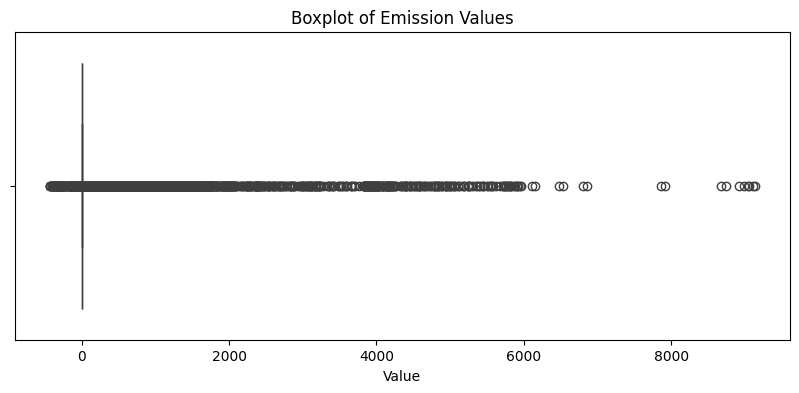

In [13]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_normalized["Value"])
plt.title("Boxplot of Emission Values")

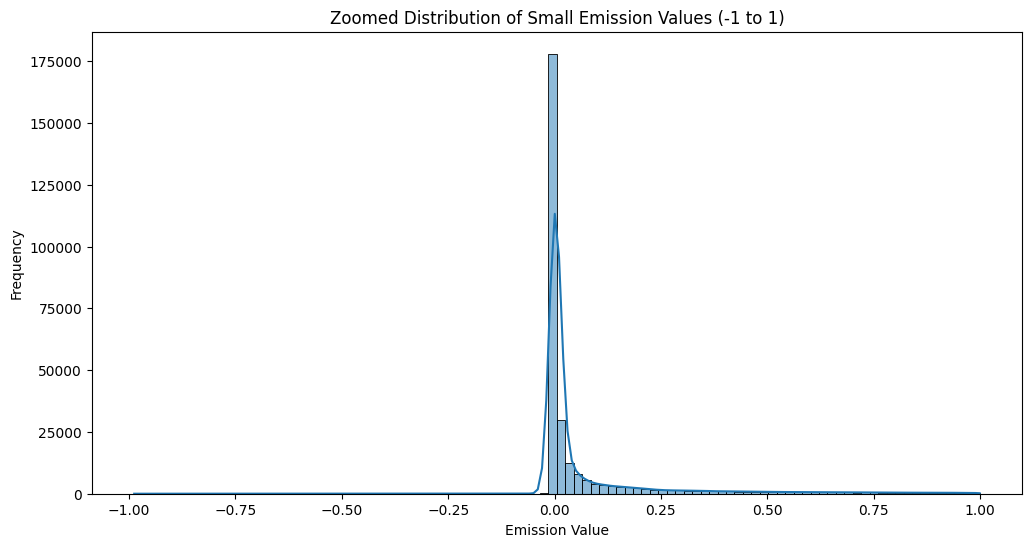

In [14]:
small_values = df_normalized[(df_normalized["Value"] > -1) & (df_normalized["Value"] < 1)]

plt.figure(figsize=(12, 6))
sns.histplot(small_values["Value"], bins=100, kde=True)
plt.title("Zoomed Distribution of Small Emission Values (-1 to 1)")
plt.xlabel("Emission Value")
plt.ylabel("Frequency")
plt.show()


Text(0, 0.5, 'Sector')

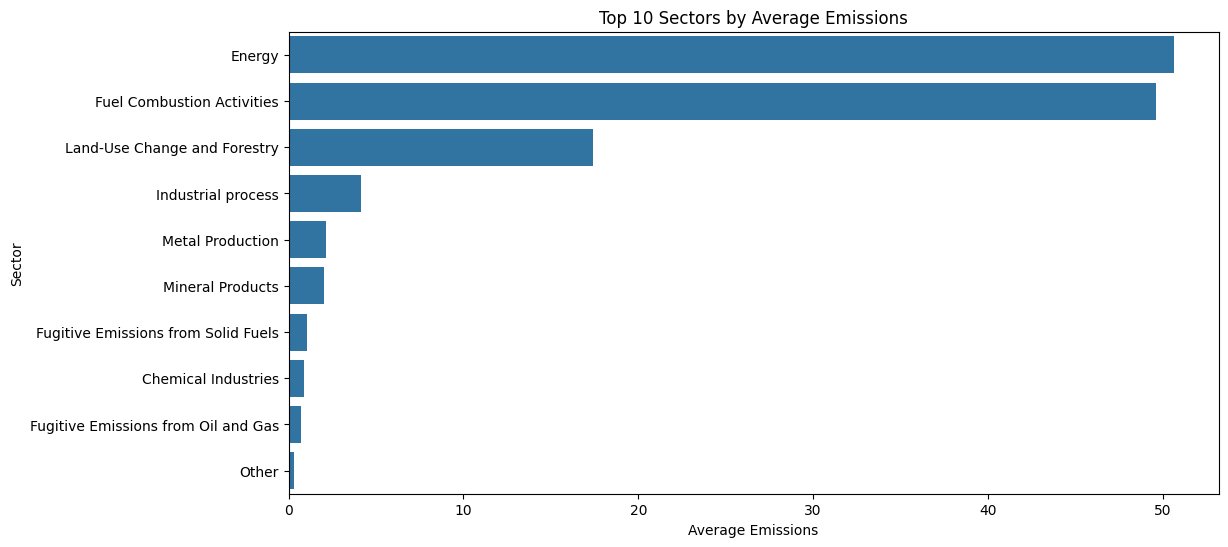

In [15]:
top_sectors = df_normalized.groupby("Sector")["Value"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top 10 Sectors by Average Emissions")
plt.xlabel("Average Emissions")
plt.ylabel("Sector")


Text(0, 0.5, 'Country')

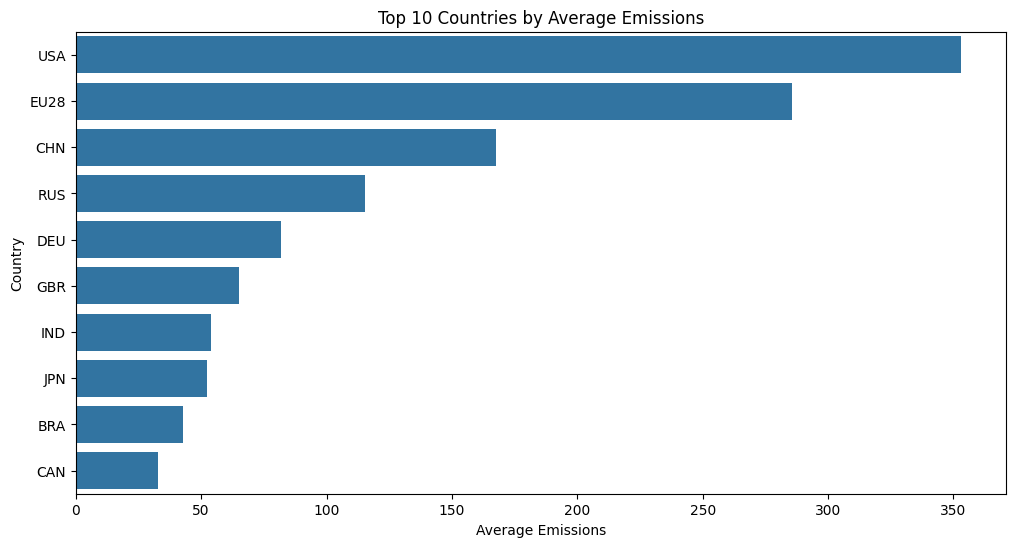

In [16]:
top_countries = df_normalized.groupby("Country")["Value"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Average Emissions")
plt.xlabel("Average Emissions")
plt.ylabel("Country")

Text(0, 0.5, 'Total Emissions')

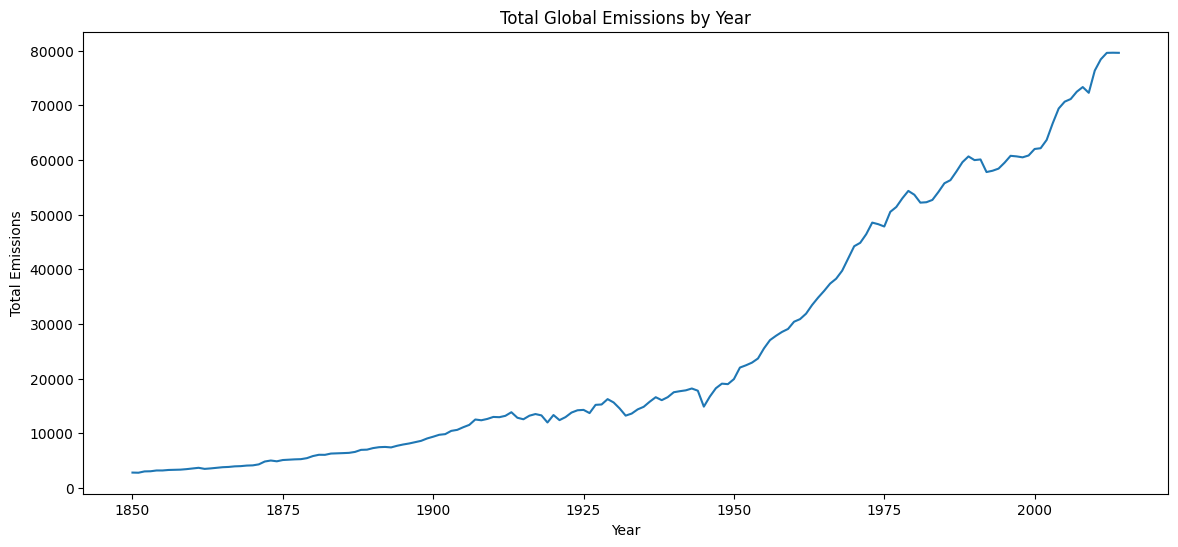

In [17]:
emissions_by_year = df_normalized.groupby("Year")["Value"].sum()

plt.figure(figsize=(14, 6))
emissions_by_year.plot()
plt.title("Total Global Emissions by Year")
plt.xlabel("Year")
plt.ylabel("Total Emissions")

### Export Cleaned Dataset
We save the cleaned and transformed dataset to a new CSV file.

In [18]:
df_long.to_csv("emissions_clean.csv", index=False)
print("Cleaned CSV exported as 'emissions_clean.csv'")

Cleaned CSV exported as 'emissions_clean.csv'
